# Question 1 : Logistic Regression


## Import functions and data

In [1]:
# run this cell to import nltk
import numpy as np
import pandas as pd
import nltk
from os import getcwd
import re
import string

### Imported functions

Download the data needed for this assignment. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).

* twitter_samples and stopwords: While running on a local computer you need to download them using
```Python
nltk.download('twitter_samples')
nltk.download('stopwords')
```

#### Import some helper functions that we provided in the utils.py file:
* `clean_tweet()`: cleans, tokenizes, removes stopwords, and converts words to stems.
* `build_frequency()`: this counts how often a word in the the entire set dataset of tweets was associated with a positive label '1' or a negative label '0', then builds the `frequency_words` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.
* The `frequency_words` dictionary is the frequency dictionary that's being built. 

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ratikantlab\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratikantlab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# this code allows us to prevent downloading data again while refreshing our workspace
filePath = f"{getcwd()}/../temp/"
nltk.data.path.append(filePath)

In [4]:
print(filePath)

C:\Users\ratikantlab/../temp/


### Data processing
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.  

In [5]:

from nltk.corpus import twitter_samples 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer



In [6]:





def clean_tweet(tweet):
    
    # tweets_clean: a list of words containing the processed tweet
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market symbols like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and  
                word not in stopwords_english): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_frequency(tweets, y_np):
 
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(y_np).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for i in range(len(tweets)):
        tweet = tweets[i]
        y = yslist[i]
        for word in clean_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [7]:
# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [8]:
print(positive_tweets[7])
print(negative_tweets[10])

@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
I have a really good m&amp;g idea but I'm never going to meet them :(((


In [9]:
clean_tweet(positive_tweets[0])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

### Feature Extraction

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
    * For each word, check the `frequency_words` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

In [10]:
def extract_features(tweet, freqs):
    
    # clean_tweet tokenizes, stems, and removes stopwords
    word_l = clean_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    
    for word in word_l:
        
        # increment the word count when the  label is positive 
        x[0,1] = x[0,1] + freqs.get((word, 1.0),0)
        # increment the word count when the  label is negative 
        x[0,2] = x[0,2] + freqs.get((word, 0.0),0)
        
    return x

#### Instructions: Write `sigmoid`
Finds the sigmoid of z 

In [11]:
def sigmoid(z): 
    
    # z is an input which can be a scalar or an array and h is the sigmoid of z 
    # write the formula for sigmoid here and assign it to h
    h = 1 / (1 + np.exp(-z))
    return h

#### Instructions: Write `predict_positivity_score`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the y.
* Apply the sigmoid to the y to get the prediction (a value between 0 and 1).


In [12]:
def predict_positivity_score(tweet, freqs, theta):
    
    
    # extracting features from tweet and the frequencies, this x will multiply with the coefficients which are passed to the 
    # sigmoid 
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    # you need to make calculations for y_pred here. You may need to call sigmoid function here
    y_pred = sigmoid(np.matmul(x,theta))
    
    return int((y_pred >= 0.5)[0][0])

Note that the `frequency_words` dictionary should be based on the training data and training labels. Here we have done this for a few number of data points


The given function `clean_tweet()` makes tokens from words and applies stemming (producing some variant of a root/base word) and removes stop words (commonly used words such as "the" ,"a" ,"an" among other words)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
#IMPLEMENT gradient descient here. 
# alpha is the learning rate 
# x is the data and y is hte label 
# theta is the initial parameter values 
# num_iters is the number of iterations you want the algorithm to run
def gradientDescent(x, y, theta, alpha, num_iters):
    eps= 1e-7
    list_of_loss_values = []
    list_of_training_accuracy = []
    number_of_samples = x.shape[0]
    for i in range(num_iters):
        a = sigmoid(np.matmul(x,theta))
        loss = -np.average(y*np.log(a + eps) + (1-y)*np.log(1-a + eps))
        theta = theta - alpha * np.matmul(x.T, (a-y)) / number_of_samples ## Update theta
        list_of_loss_values.append(loss)
        accuracy = accuracy_score(y, a >= 0.5)
        list_of_training_accuracy.append(accuracy)
    # list_of_loss_values is the loss for each iteration which , same is the case with training accuracy
    J = loss
    return J, theta,list_of_loss_values,list_of_training_accuracy

* Train test split: 25% will be in the test set, and 75% in the training set.

# Example
 # Here we show how to call these methods for a few data points. You  may have to use similar calls to the training data after you make the test train split.

In [15]:
from sklearn.model_selection import train_test_split
train_pos_tweets, test_pos_tweets, train_neg_tweets, test_neg_tweets = train_test_split(positive_tweets, negative_tweets, test_size=.25)

train_tweets = train_pos_tweets + train_neg_tweets
train_labels = np.append(np.ones((len(train_pos_tweets), 1)), np.zeros((len(train_neg_tweets), 1)), axis=0 )

test_tweets = test_pos_tweets + test_neg_tweets
test_labels = np.append(np.ones((len(test_pos_tweets), 1)), np.zeros((len(test_neg_tweets), 1)), axis=0 )


print("Number of Training Positive Tweets",len(train_pos_tweets))
print("Number of Validation Positive Tweets ",len(test_pos_tweets))
print("Number of Training Negative Tweets ",len(train_neg_tweets))
print("Number of Validation Negative Tweets ",len(test_neg_tweets))

frequency_words = build_frequency(train_tweets, train_labels)

train_data = []
for tweet in train_tweets:
    train_data.append(extract_features(tweet, frequency_words))
train_data = np.concatenate(train_data)

Number of Training Positive Tweets 3750
Number of Validation Positive Tweets  1250
Number of Training Negative Tweets  3750
Number of Validation Negative Tweets  1250


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
some_number_of_tweets = positive_tweets[0:10] + negative_tweets[0:10]
some_number_of_labels = np.append(np.ones((len(positive_tweets[0:10]), 1)), np.zeros((len(negative_tweets[0:10]), 1)), axis=0)

In [18]:
#frequency_words = build_frequency(some_number_of_tweets, some_number_of_labels)

In [19]:

# Random tests, you can remove these if you want later , but it may help in testing the code 
print(extract_features(some_number_of_tweets[6], frequency_words))
# test 2:
# check for when the words are not in the frequency_words dictionary
print(extract_features('lalalalala blahblahblah bobobobobbob', frequency_words))



[[1.000e+00 3.683e+03 4.880e+02]]
[[1. 0. 0.]]


In [20]:
extract_features('terw gdfjeru s gdfgeru', frequency_words)

array([[1., 0., 0.]])

In [21]:
# NOTE : call gradient descent to get coefficents and then pass that coefficents into predict function 
# something like : predict_positivity_score(tweet, frequency_words, coefficents)
theta = np.zeros((3, 1))
J, theta, list_of_loss_values,list_of_training_accuracy = gradientDescent(x = train_data, y = train_labels, theta = theta, alpha=0.0001, num_iters=10)
a = predict_positivity_score("@Jacksnider @Johnwick Oops...that's called a #SundayParty :) I'll get gift right now! Thank you, J", frequency_words, theta)

## Testing your model
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

#### Implement `test_logistic` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* Use your `predict_positivity_score()` function to make predictions on each tweet in the test set.
* If the prediction is >= 0.5, set the model's the predicted label is 1 otherwise it is 0.  


In [22]:
# Testing your model on the test set
def test_logistic(test_x, test_y, freqs, theta):
    
    #use your trained model to make predictions and then compare those predictions with the 
    # actual values to come up with an accuracy. and return this accuracy
    test_data = []
    for tweet in test_x:
        test_data.append(predict_positivity_score(tweet, freqs, theta))
    y_pred = np.array(test_data)
    return accuracy_score(test_y, y_pred)


In [23]:
test_accuracy = test_logistic(test_x = test_tweets, test_y= test_labels, freqs= frequency_words, theta = theta)

In [24]:
# Use your model to predict what these result in, whether it is a positive or negative sentiment. If possible, feel free to give
# an intuitive explanation (short explanation) of the scores that you obtained

my_tweet = ['Let that sink in',
            'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ',
            'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.',
            'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.',
            'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing'
           ]



In [25]:
my_tweet_predict = []
for tweet in my_tweet:
    my_tweet_predict.append(predict_positivity_score(tweet, freqs=frequency_words, theta = theta))

In [26]:
list(zip(my_tweet, my_tweet_predict))
x = range(1, len(list_of_loss_values) + 1)

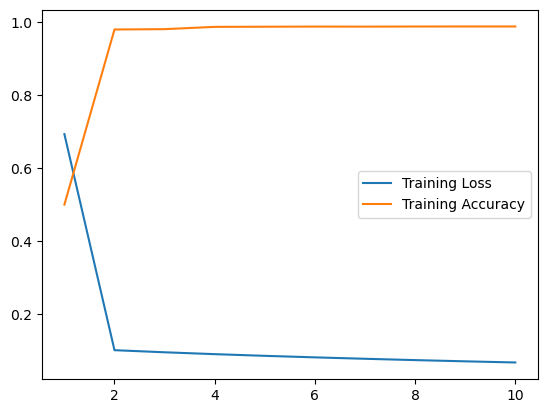

In [27]:
import matplotlib.pyplot as plt
plt.plot(x,list_of_loss_values,x,list_of_training_accuracy)
plt.legend(['Training Loss','Training Accuracy'])
plt.show()

In [28]:
print("Validation accuracy is:", test_accuracy)
print("Training Accuracy is:" ,list_of_training_accuracy[-1])

Validation accuracy is: 0.9872
Training Accuracy is: 0.9881333333333333


**Limitation of this model**

In this method,we have to store frequency words and new words can occur in outside of the training dataset,hence not in frequency_words.This shows that new word can not be considered during the prediction

In [29]:
#Analysis after removing all 5 of the emotions mentioned 

frequency_words = {m:n for m, n in frequency_words.items() if m[0] not in [':)', ':(', ':-)', ':-(', ':d']}

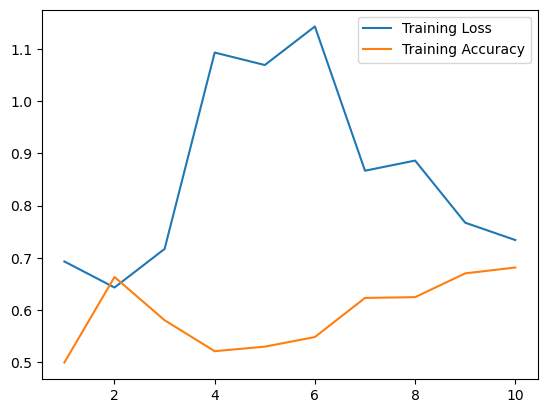

In [30]:
train_data = []
for tweet in train_tweets:
    train_data.append(extract_features(tweet, frequency_words))
train_data = np.vstack(train_data)


theta = np.zeros((3, 1))
J, theta, list_of_loss_values,list_of_training_accuracy = gradientDescent(x = train_data, y = train_labels, theta = theta, alpha=0.0001, num_iters=10)
a = predict_positivity_score("@Jacksnider @Johnwick Oops...that's called a #SundayParty :) I'll get gift right now! Thank you, J", frequency_words, theta)
plt.plot(x,list_of_loss_values,x,list_of_training_accuracy)
plt.legend(['Training Loss','Training Accuracy'])
plt.show()

From the plotting,it is clear that model training is very bad after removing the emotions.